<a href="https://colab.research.google.com/github/bhuwanadhikari/3-way-anova/blob/main/3_way_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# prompt: read a file sandwich.csv that has my dataset

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Read the CSV file into a pandas DataFrame
df = pd.read_csv('sandwich.csv')


# To get summary statistics for numerical columns:
# print(df.describe())


# Convert categorical variables to category dtype
df['bread'] = df['bread'].astype('category')
df['topping'] = df['topping'].astype('category')
df['butter'] = df['butter'].astype('category')


# Fit the three-way ANOVA model
model = ols('antCount ~ C(bread) * C(topping) * C(butter)', data=df).fit()


anova_table = sm.stats.anova_lm(model, typ=2)


anova_table







,sum_sq,df,F,PR(>F)
C(bread),40.50,3.0,0.142043,0.933761
C(topping),3720.50,2.0,19.572994,0.000009
C(butter),1386.75,1.0,14.590969,0.000830
C(bread):C(topping),577.00,6.0,1.011837,0.440987
C(bread):C(butter),378.75,3.0,1.328365,0.288413
C(topping):C(butter),56.00,2.0,0.294608,0.747479
C(bread):C(topping):C(butter),2345.50,6.0,4.113108,0.005597
Residual,2281.00,24.0,NaN,NaN


In [9]:
from statsmodels.stats.anova import anova_lm
import itertools
import statsmodels.stats.multicomp as mc


# Create a combined factor for the 3-way interaction
df['bread_topping_butter'] = df['bread'].astype(str) + "_" + df['topping'].astype(str) + "_" + df['butter'].astype(str)

# Perform Tukey HSD post hoc test on the interaction factor
tukey_interaction = pairwise_tukeyhsd(df['antCount'], df['bread_topping_butter'])

comp = mc.MultiComparison(df['antCount'], df['topping'])
tukey_result = comp.tukeyhsd()

# Display results
print(tukey_result.summary())


NameError: name 'pairwise_tukeyhsd' is not defined

<ipython-input-10-3205781515>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="topping", y="antCount", data=df, palette="Set2")


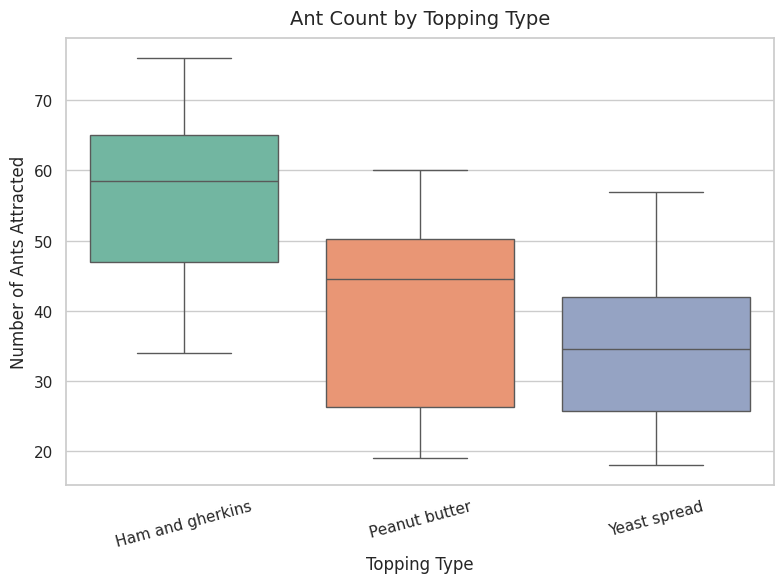

<ipython-input-10-3205781515>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


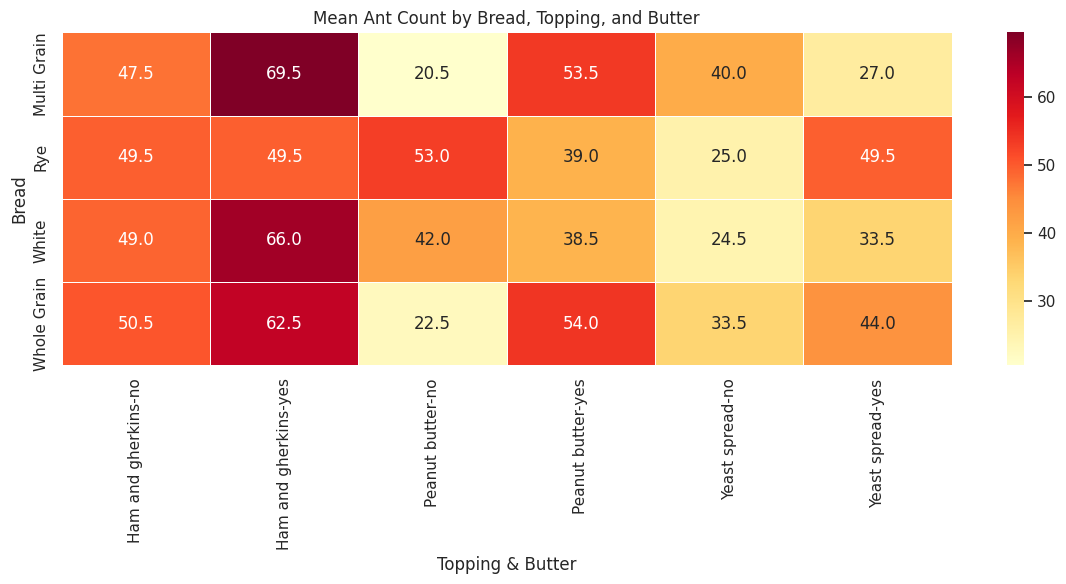

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a boxplot to visualize ant counts by topping
plt.figure(figsize=(8, 6))
sns.boxplot(x="topping", y="antCount", data=df, palette="Set2")
plt.title("Ant Count by Topping Type", fontsize=14, pad=10)
plt.xlabel("Topping Type", fontsize=12)
plt.ylabel("Number of Ants Attracted", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Create pivot table for heatmap
pivot_table = df.pivot_table(
    values='antCount',
    index='bread',
    columns=['topping', 'butter'],
    aggfunc='mean'
)


# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=0.5)
plt.title('Mean Ant Count by Bread, Topping, and Butter')
plt.ylabel('Bread')
plt.xlabel('Topping & Butter')
plt.tight_layout()
plt.show()

<ipython-input-11-358817125>:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df[df['butter'] == 'no'], x="topping", y="antCount", hue="bread",
<ipython-input-11-358817125>:17: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df[df['butter'] == 'yes'], x="topping", y="antCount", hue="bread",


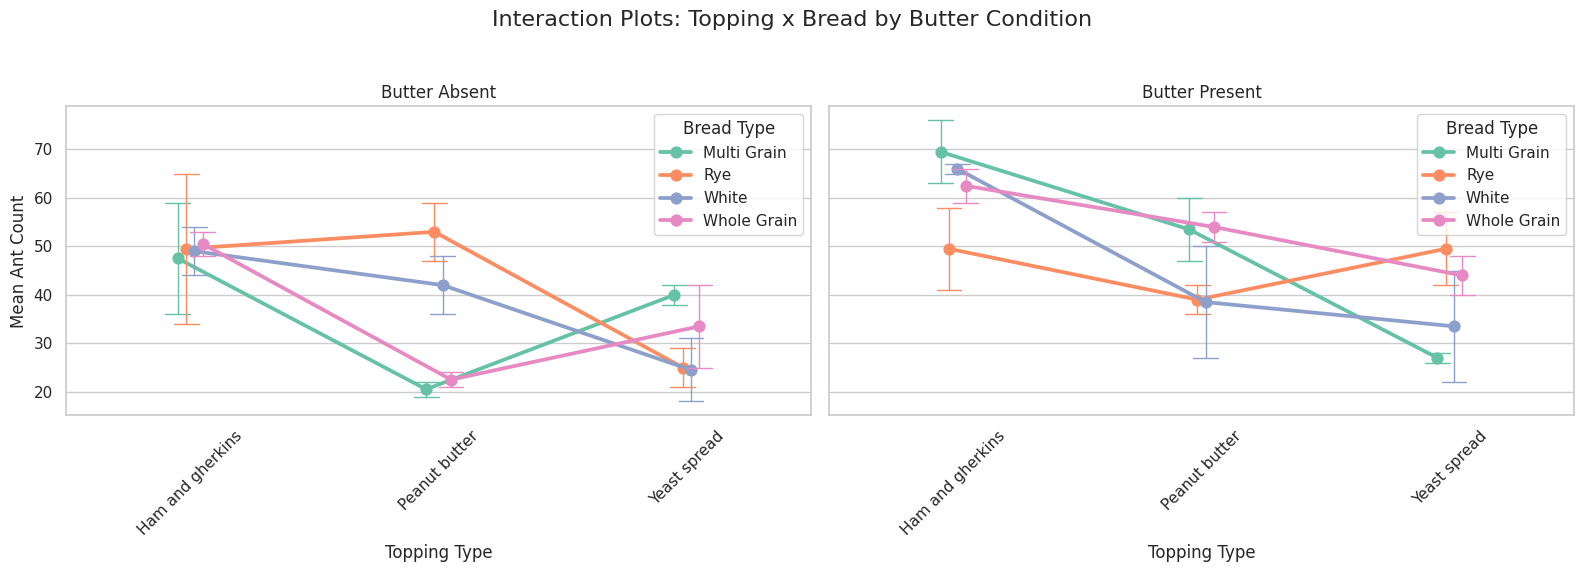

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for butter = yes and butter = no
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for butter = no
sns.pointplot(data=df[df['butter'] == 'no'], x="topping", y="antCount", hue="bread",
              dodge=True, capsize=.1, errwidth=1, palette="Set2", ax=axes[0])
axes[0].set_title("Butter Absent")
axes[0].set_xlabel("Topping Type")
axes[0].set_ylabel("Mean Ant Count")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Bread Type")

# Plot for butter = yes
sns.pointplot(data=df[df['butter'] == 'yes'], x="topping", y="antCount", hue="bread",
              dodge=True, capsize=.1, errwidth=1, palette="Set2", ax=axes[1])
axes[1].set_title("Butter Present")
axes[1].set_xlabel("Topping Type")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Bread Type")

plt.suptitle("Interaction Plots: Topping x Bread by Butter Condition", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
# Add an index name to each for clarity
desc_overall = df["antCount"].describe()

desc_by_bread = df.groupby("bread")["antCount"].describe()
desc_by_topping = df.groupby("topping")["antCount"].describe()
desc_by_butter = df.groupby("butter")["antCount"].describe()

desc_overall, desc_by_bread, desc_by_topping, desc_by_butter


<ipython-input-13-86916561>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_by_bread = df.groupby("bread")["antCount"].describe()
<ipython-input-13-86916561>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_by_topping = df.groupby("topping")["antCount"].describe()
<ipython-input-13-86916561>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_by_butter = df.groupby("butter")["antCount"].describe()


(count    48.000000
 mean     43.500000
 std      15.148906
 min      18.000000
 25%      30.500000
 50%      43.000000
 75%      57.000000
 max      76.000000
 Name: antCount, dtype: float64,
              count   mean        std   min    25%   50%    75%   max
 bread                                                               
 Multi Grain   12.0  43.00  18.230843  19.0  27.50  40.0  59.25  76.0
 Rye           12.0  44.25  13.396913  21.0  35.50  42.0  57.25  65.0
 White         12.0  42.25  15.863767  18.0  30.00  44.5  51.00  67.0
 Whole Grain   12.0  44.50  14.606972  21.0  36.25  48.0  54.00  66.0,
                   count    mean        std   min    25%   50%    75%   max
 topping                                                                   
 Ham and gherkins   16.0  55.500  12.055428  34.0  47.00  58.5  65.00  76.0
 Peanut butter      16.0  40.375  14.183911  19.0  26.25  44.5  50.25  60.0
 Yeast spread       16.0  34.625  11.158704  18.0  25.75  34.5  42.00  57.0,
     

<ipython-input-14-799800285>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bread", y="antCount", data=df, palette="Set2")
<ipython-input-14-799800285>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="topping", y="antCount", data=df, palette="Set2")
<ipython-input-14-799800285>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="butter", y="antCount", data=df, palette="Set2")


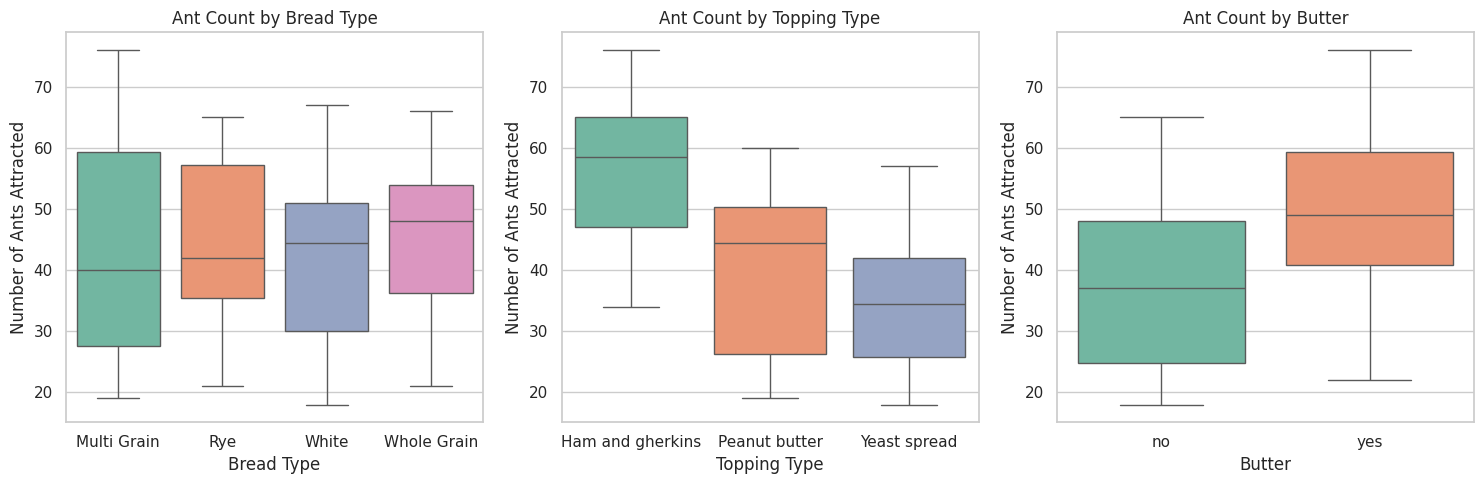

In [14]:
# prompt: create box plot for each of the categories

import matplotlib.pyplot as plt
# Create boxplots for each categorical variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="bread", y="antCount", data=df, palette="Set2")
plt.title("Ant Count by Bread Type")
plt.xlabel("Bread Type")
plt.ylabel("Number of Ants Attracted")

plt.subplot(1, 3, 2)
sns.boxplot(x="topping", y="antCount", data=df, palette="Set2")
plt.title("Ant Count by Topping Type")
plt.xlabel("Topping Type")
plt.ylabel("Number of Ants Attracted")

plt.subplot(1, 3, 3)
sns.boxplot(x="butter", y="antCount", data=df, palette="Set2")
plt.title("Ant Count by Butter")
plt.xlabel("Butter")
plt.ylabel("Number of Ants Attracted")

plt.tight_layout()
plt.show()